In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
from matplotlib.cm import PuOr
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
from pycebox.ice import ice, ice_plot

In [4]:
# from random.org, for reproducibility
np.random.seed(400845)

# ⬛ PyCEBox Tutorial

This tutorial recreates the first example from [_Peeking Inside the Black Box: Visualizing
Statistical Learning with Plots of Individual Conditional Expectation_](https://arxiv.org/pdf/1309.6392v2.pdf) using [`pycebox`](https://github.com/AustinRochford/PyCEbox).

First we generate 1,000 data points from the model $X_1, X_2, X_3 \sim U(-1, 1)$, $\varepsilon \sim N(0, 1)$,

$$y = 0.2 X_1 - 5 X_2 + 10 X_2 \cdot \mathbb{I}(X_3 \geq 0) + \varepsilon,$$

where $\mathbb{I}(\cdot)$ is the indicator function.

In [5]:
N = 1000

In [6]:
df = pd.DataFrame(sp.stats.uniform.rvs(-1, 2, size=(N, 3)),
                  columns=['x1', 'x2', 'x3'])
noise = sp.stats.norm.rvs(size=N)

In [7]:
y = 0.2 * df.x1 - 5 * df.x2 + 10 * df.x2 * (df.x3 >= 0) + noise

We will study the relationship between $y$ and $X_2$, which is shown below.

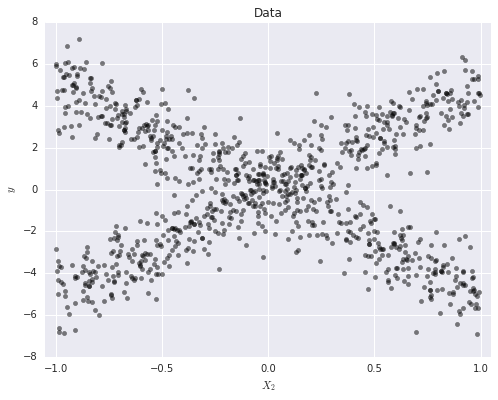

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(df.x2, y, c='k', alpha=0.5);

ax.set_xlim(-1.05, 1.05);
ax.set_xlabel('$X_2$');

ax.set_ylabel('$y$');

ax.set_title('Data');

We fit a [`scikit-learn` `GradientBoostringRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html) to the data.

In [9]:
gbm = GradientBoostingRegressor()
gbm.fit(df.values, y)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

We can now use `pycebox`'s `ice` function, to generate individual conditional expectation curves with respect to the fitted model and the predictor $X_2$.

In [10]:
ice_df = ice(df, 'x2', gbm.predict)

Each column of `ice_df` corresponds to a data point, with the $X_2$ value removed.  Each row corresponds to an $X_2$ value.

In [11]:
ice_df.head()

x1,-0.994113,-0.993808,-0.990203,-0.984493,-0.983538,-0.979829,-0.976991,-0.976516,-0.972979,-0.971839,...,0.984775,0.985207,0.985874,0.989149,0.992757,0.993433,0.994070,0.996669,0.999260,0.999449
x3,-0.603206,0.607246,0.647453,0.146147,0.028065,0.455209,0.452666,0.136407,-0.065763,-0.995279,...,-0.666055,0.743252,0.683926,-0.095871,0.429351,0.250197,-0.575222,0.220905,-0.840081,-0.421717
x2,,,,,,,,,,,,,,,,,,,,,
-0.999685,5.302476,-4.588058,-4.672740,-4.537621,-3.929266,-4.588058,-4.588058,-4.487253,4.743751,7.129136,...,5.602077,-3.900489,-3.973863,5.382146,-3.667001,-4.713368,4.123134,-3.635017,4.649142,4.638197
-0.997213,5.302476,-4.588058,-4.672740,-4.537621,-3.929266,-4.588058,-4.588058,-4.487253,4.743751,7.129136,...,5.602077,-3.900489,-3.973863,5.382146,-3.667001,-4.713368,4.123134,-3.635017,4.649142,4.638197
-0.996914,5.302476,-4.588058,-4.672740,-4.537621,-3.929266,-4.588058,-4.588058,-4.487253,4.743751,7.129136,...,5.602077,-3.900489,-3.973863,5.382146,-3.667001,-4.713368,4.123134,-3.635017,4.649142,4.638197
-0.994768,4.769346,-4.588058,-4.672740,-4.537621,-3.929266,-4.588058,-4.588058,-4.487253,4.211394,6.596007,...,5.068947,-3.900489,-3.973863,4.849788,-3.667001,-4.713368,3.590005,-3.635017,4.116013,4.105839
-0.992745,3.793492,-5.564258,-5.648939,-5.513820,-3.989283,-5.564258,-5.564258,-5.463452,3.235540,5.620153,...,4.805832,-4.446911,-4.520285,4.586673,-4.213424,-5.259791,3.326890,-4.181439,3.852898,3.842724


The individual conditional expectation curves in `ice_df` can now be plotting using your visualization package of choice.  `pycebox` includes a convenience function, `ice_plot` for plotting the individual conditional expectation curves using [`matplotlib`](http://matplotlib.org/).

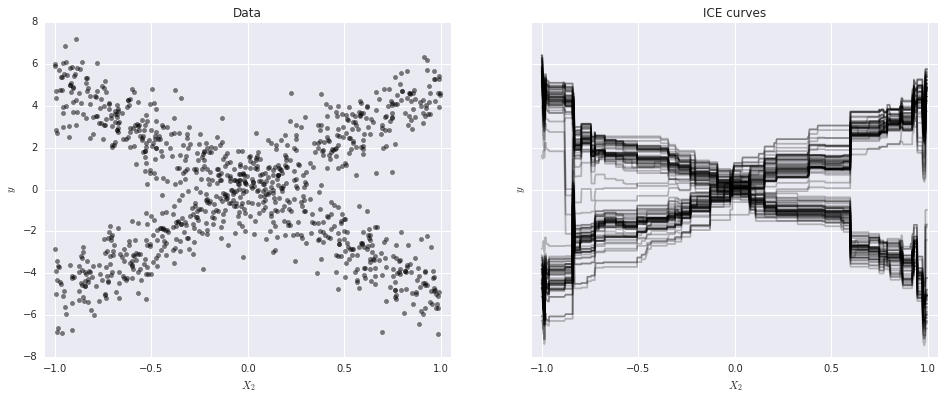

In [12]:
fig, (data_ax, ice_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(16, 6))

data_ax.scatter(df.x2, y, c='k', alpha=0.5);

data_ax.set_xlim(-1.05, 1.05);
data_ax.set_xlabel('$X_2$');

data_ax.set_ylabel('$y$');

data_ax.set_title('Data');

ice_plot(ice_df, frac_to_plot=0.1,
         c='k', alpha=0.25,
         ax=ice_ax);

ice_ax.set_xlabel('$X_2$');

ice_ax.set_ylabel('$y$');

ice_ax.set_title('ICE curves');

Inspecting the ICE curves, it seems quite likely that there is an important interaction.  Since we know the data generating process, we know that the key interaction is between $X_2$ and $X_2$.  The function `ice_plot` accepts `color_by` keywords, which accepts either a string, which represents the column in the initial `DataFrame` or a function to apply to the column index in the ICE `DataFrame` to use for coloring the ICE plots.

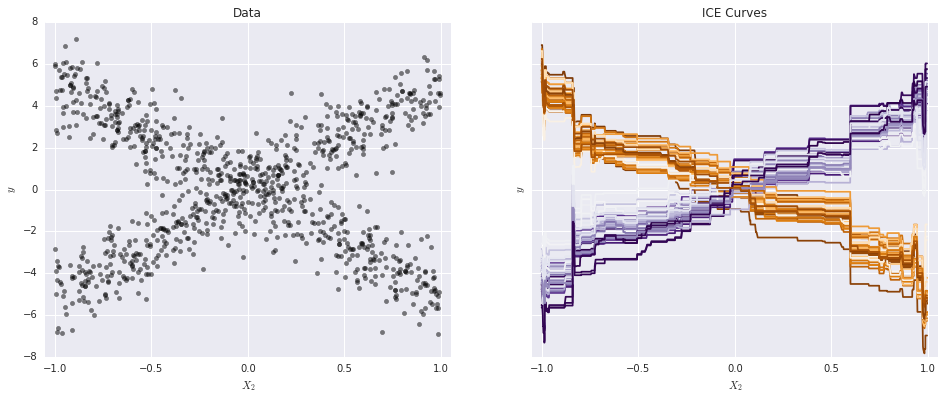

In [13]:
fig, (data_ax, ice_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(16, 6))

data_ax.scatter(df.x2, y, c='k', alpha=0.5);

data_ax.set_xlim(-1.05, 1.05);
data_ax.set_xlabel('$X_2$');

data_ax.set_ylabel('$y$');

data_ax.set_title('Data');

ice_plot(ice_df, frac_to_plot=0.1,
         color_by='x3', cmap=PuOr,
         ax=ice_ax);

ice_ax.set_xlabel('$X_2$');

ice_ax.set_ylabel('$y$');

ice_ax.set_title('ICE Curves');

This plot makes the interaction between $X_2$ and $X_3$ quite transparent.